# K-means

* an unsupervised learning technique that groups data points into clusters based on similarity
* K-means is a centroid-based algorithm or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.


1. Initialization: Start by randomly selecting K points from the dataset. These points will act as the initial cluster centroids.
2. Assignment: For each data point in the dataset, calculate the distance between that point and each of the K centroids. Assign the data point to the cluster whose centroid is closest to it. This step effectively forms K clusters.
3. Update centroids: Once all data points have been assigned to clusters, recalculate the centroids of the clusters by taking the mean of all data points assigned to each cluster.
4. Repeat: Repeat steps 2 and 3 until convergence. Convergence occurs when the centroids no longer change significantly or when a specified number of iterations is reached.
5. Final Result: Once convergence is achieved, the algorithm outputs the final cluster centroids and the assignment of each data point to a cluster.


### Properties:
1. All the data points in a cluster should be similar to each other.
2. The data points from different clusters should be as different as possible.

Normally, we use Euclidean distance as the distance metric, as long as most of the features are numeric; otherwise, Manhattan distance in case most of the features are categorical.

### Evaluation metric:
1. Inertia: calculates the sum of distances of all the points within a cluster from the centroid of that cluster
2. Dunn Index: distance between the centroids of two different clusters is known as inter-cluster distance. Dunn index is the ratio of the minimum of inter-cluster distances and maximum of intracluster distances.


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum((a-b)**2))
  

In [20]:
class KMeans:
    def __init__(self, k = 3, max_iter = 100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None

    def assign_clusters(self, x):
        clusters =[]

        for sample in x:
            distance = [euclidean_distance(sample, c) for c in self.centroids]
            cluster_id = np.argmin(distance)
            clusters.append(cluster_id)

        return np.array(clusters)
    
    def fit(self, x):
        n_samples, n_features = x.shape

        random_indices = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = x[random_indices]

        for _ in range(self.max_iter):
            cluster = self.assign_clusters(x)
            print("The size of each cluster is: ", len(cluster))

            new_centroids = np.array([x[cluster==i].mean(axis =0) for i in range(self.k)])

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def predict(self, x):
        return self.assign_clusters(x)



In [24]:
X = np.array([
    [1, 2], [1, 4], [1, 0],
    [10, 2], [10, 4], [10, 0],
    [5, 10], [6, 12], [4, 11]
])

kmeans = KMeans(k=3)
kmeans.fit(X)

print("Centroids:")
print(kmeans.centroids)

print("Predictions:")
print(kmeans.predict(X))

The size of each cluster is:  9
The size of each cluster is:  9
Centroids:
[[ 1.  2.]
 [10.  2.]
 [ 5. 11.]]
Predictions:
[0 0 0 1 1 1 2 2 2]


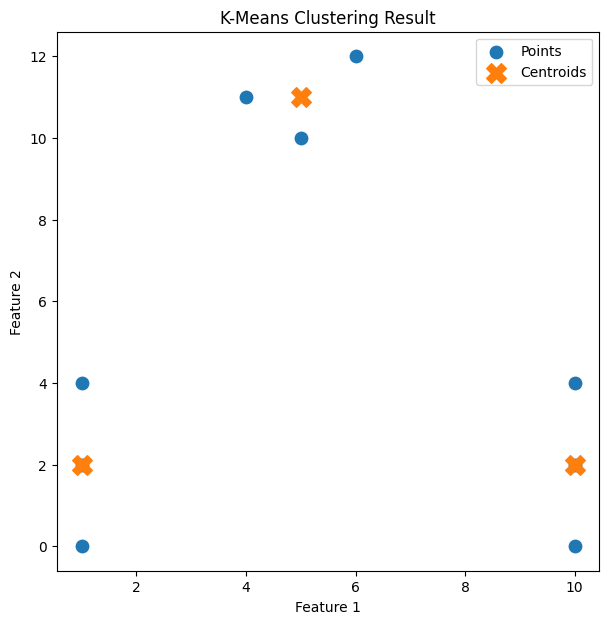

In [25]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], s=80, label="Points")
centroids = kmeans.centroids
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=200, label="Centroids")

plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()